### LIMPIEZA Y PROCESAMIENTO: **CONSUMO ENERGÉTICO MUNDIAL**

In [1]:
# Se importan las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#  Se ajustan algunas opciones de visualización de pandas para cambiar la forma en que se muestran los datos.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [3]:
# Se importa el dataset
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

## Limpieza y procesamiento general

#### Descartamos las filas correspondientes a regiones y continentes, así como a países actualmente inexistentes (Yugoslavia, Checoslovaquia etc.) <br>
#### Por exploración previa del dataset sabemos que corresponden a las filas donde iso_code es nulo, ya que no cuentan con codigo ISO. 

In [4]:
# Se filtan las filas del DataFrame, donde el valor en la columna "iso_code" no es nulo.
wec = wec[~wec["iso_code"].isnull()]
wec = wec[~(wec["country"] == "World")]

### Cambiamos las unidades de la columna "gdp" (PBI) para que esté en miles de millones de dólares y "population" (población) para que quede en millones de personas, para facilitar la dimensión de la unidad:

In [5]:
# Se escalan las columnas
wec["gdp"] = wec["gdp"]/10**9
wec["population"] = wec["population"]/10**6

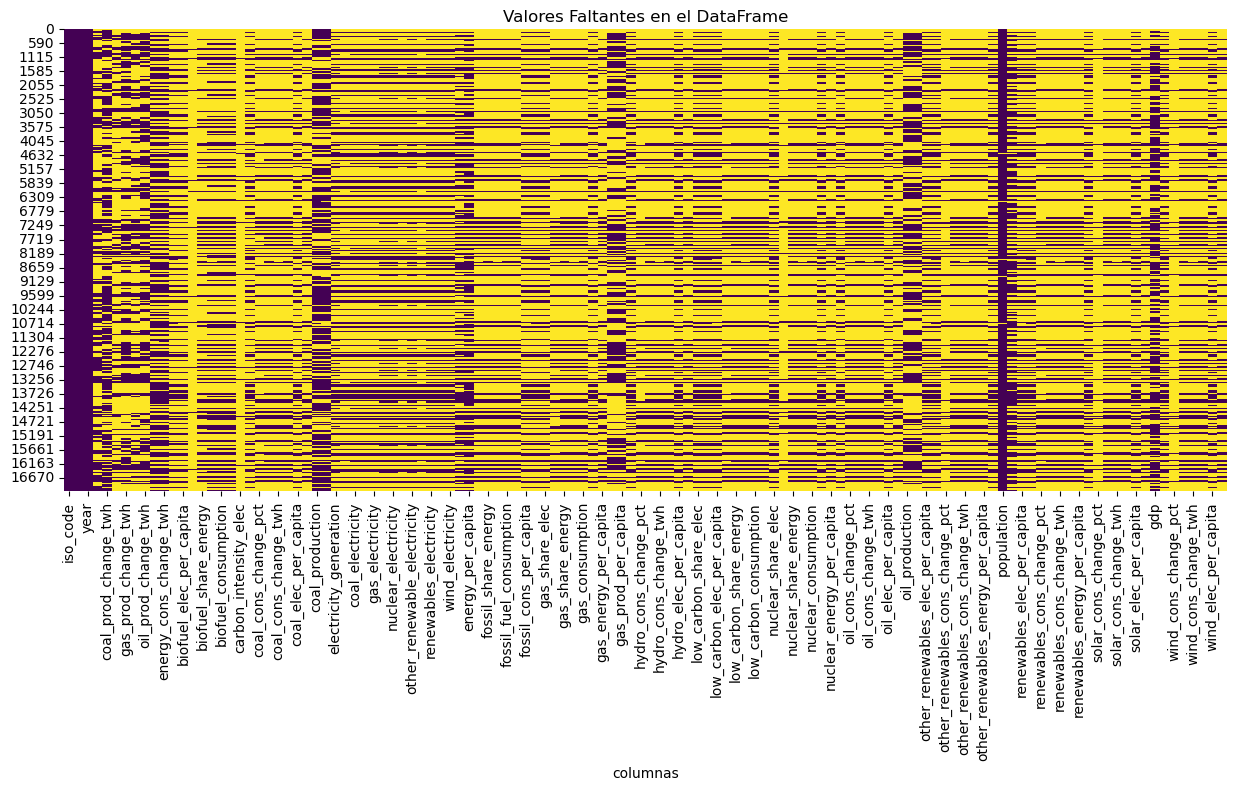

In [6]:
# Se visualizan de valores faltantes
plt.figure(figsize=(15, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('columnas')
plt.show()

In [7]:
# Se consultan la cantidad de filas y columnas
print("Cantidad de filas y columnas del DataFrame wec:", wec.shape)

Cantidad de filas y columnas del DataFrame wec: (15509, 122)


## Asignamos continente a cada pais

In [8]:
# Se realiza un mapeo entre códigos ISO y continentes.
iso_to_continent = {
    'DZA': 'África', 'AGO': 'África', 'BEN': 'África', 'BWA': 'África', 'BFA': 'África', 'BDI': 'África', 'CMR': 'África', 'CPV': 'África', 'CAF': 'África', 'TCD': 'África', 'COM': 'África', 'COD': 'África', 'DJI': 'África', 'EGY': 'África', 'GNQ': 'África', 'ERI': 'África', 'ETH': 'África', 'GAB': 'África', 'GMB': 'África', 'GHA': 'África', 'GIN': 'África', 'GNB': 'África', 'CIV': 'África', 'KEN': 'África', 'LSO': 'África', 'LBR': 'África', 'LBY': 'África', 'MDG': 'África', 'MWI': 'África', 'MLI': 'África', 'MRT': 'África', 'MUS': 'África', 'MYT': 'África', 'MAR': 'África', 'MOZ': 'África', 'NAM': 'África', 'NER': 'África', 'NGA': 'África', 'COG': 'África', 'REU': 'África', 'RWA': 'África', 'SHN': 'África', 'STP': 'África', 'SEN': 'África', 'SYC': 'África', 'SLE': 'África', 'SOM': 'África', 'ZAF': 'África', 'SSD': 'África', 'SDN': 'África', 'SWZ': 'África', 'TZA': 'África', 'TGO': 'África', 'TUN': 'África', 'UGA': 'África', 'ESH': 'África', 'ZMB': 'África', 'ZWE': 'África',
    'AFG': 'Asia', 'ARM': 'Asia', 'AZE': 'Asia', 'BHR': 'Asia', 'BGD': 'Asia', 'BTN': 'Asia', 'IOT': 'Asia', 'BRN': 'Asia', 'KHM': 'Asia', 'CHN': 'Asia', 'CCK': 'Asia', 'GEO': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'IRN': 'Asia', 'IRQ': 'Asia', 'ISR': 'Asia', 'JPN': 'Asia', 'JOR': 'Asia', 'KAZ': 'Asia', 'KWT': 'Asia', 'KGZ': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAC': 'Asia', 'MYS': 'Asia', 'MDV': 'Asia', 'MNG': 'Asia', 'MMR': 'Asia', 'NPL': 'Asia', 'PRK': 'Asia', 'OMN': 'Asia', 'PAK': 'Asia', 'PSE': 'Asia', 'PHL': 'Asia', 'QAT': 'Asia', 'SAU': 'Asia', 'SGP': 'Asia', 'KOR': 'Asia', 'LKA': 'Asia', 'SYR': 'Asia', 'TWN': 'Asia', 'TJK': 'Asia', 'THA': 'Asia', 'TUR': 'Asia', 'TKM': 'Asia', 'ARE': 'Asia', 'UZB': 'Asia', 'VNM': 'Asia', 'YEM': 'Asia',
    'ALA': 'Europa', 'ALB': 'Europa', 'AND': 'Europa', 'AUT': 'Europa', 'BLR': 'Europa', 'BEL': 'Europa', 'BIH': 'Europa', 'BGR': 'Europa', 'HRV': 'Europa', 'CYP': 'Europa', 'CZE': 'Europa', 'DNK': 'Europa', 'EST': 'Europa', 'FRO': 'Europa', 'FIN': 'Europa', 'FRA': 'Europa', 'DEU': 'Europa', 'GIB': 'Europa', 'GRC': 'Europa', 'GGY': 'Europa', 'HUN': 'Europa', 'ISL': 'Europa', 'IRL': 'Europa', 'IMN': 'Europa', 'ITA': 'Europa', 'JEY': 'Europa', 'XKX': 'Europa', 'LVA': 'Europa', 'LIE': 'Europa', 'LTU': 'Europa', 'LUX': 'Europa', 'MKD': 'Europa', 'MLT': 'Europa', 'MDA': 'Europa', 'MCO': 'Europa', 'MNE': 'Europa', 'NLD': 'Europa', 'NOR': 'Europa', 'OWID_KOS': 'Europa', 'POL': 'Europa', 'PRT': 'Europa', 'ROU': 'Europa', 'RUS': 'Europa', 'SMR': 'Europa', 'SRB': 'Europa', 'SCG': 'Europa', 'SVK': 'Europa', 'SVN': 'Europa', 'ESP': 'Europa', 'SJM': 'Europa', 'SWE': 'Europa', 'CHE': 'Europa', 'UKR': 'Europa', 'GBR': 'Europa', 'VAT': 'Europa',
    'AIA': 'Norteamérica', 'ATG': 'Norteamérica', 'ABW': 'Norteamérica', 'BRB': 'Norteamérica', 'BLZ': 'Norteamérica', 'BMU': 'Norteamérica', 'BES': 'Norteamérica', 'VGB': 'Norteamérica', 'CAN': 'Norteamérica', 'CYM': 'Norteamérica', 'CRI': 'Norteamérica', 'CUB': 'Norteamérica', 'CUW': 'Norteamérica', 'DMA': 'Norteamérica', 'DOM': 'Norteamérica', 'SLV': 'Norteamérica', 'GRL': 'Norteamérica', 'GRD': 'Norteamérica', 'GLP': 'Norteamérica', 'GTM': 'Norteamérica', 'HTI': 'Norteamérica', 'HND': 'Norteamérica', 'JAM': 'Norteamérica', 'MTQ': 'Norteamérica', 'MEX': 'Norteamérica', 'MSR': 'Norteamérica', 'ANT': 'Norteamérica', 'NIC': 'Norteamérica', 'PAN': 'Norteamérica', 'PRI': 'Norteamérica', 'BLM': 'Norteamérica', 'KNA': 'Norteamérica', 'LCA': 'Norteamérica', 'MAF': 'Norteamérica', 'SPM': 'Norteamérica', 'VCT': 'Norteamérica', 'SXM': 'Norteamérica', 'BHS': 'Norteamérica', 'TTO': 'Sudamérica', 'TCA': 'Norteamérica', 'USA': 'Norteamérica', 'VIR': 'Norteamérica',
    'ARG': 'Sudamérica', 'BOL': 'Sudamérica', 'BRA': 'Sudamérica', 'CHL': 'Sudamérica', 'COL': 'Sudamérica', 'ECU': 'Sudamérica', 'FLK': 'Sudamérica', 'GUF': 'Sudamérica', 'GUY': 'Sudamérica', 'PRY': 'Sudamérica', 'PER': 'Sudamérica', 'SUR': 'Sudamérica', 'URY': 'Sudamérica', 'VEN': 'Sudamérica',
    'ASM': 'Oceanía', 'AUS': 'Oceanía', 'CXR': 'Oceanía', 'COK': 'Oceanía', 'FJI': 'Oceanía', 'PYF': 'Oceanía', 'GUM': 'Oceanía', 'KIR': 'Oceanía', 'MHL': 'Oceanía', 'FSM': 'Oceanía', 'NRU': 'Oceanía', 'NCL': 'Oceanía', 'NZL': 'Oceanía', 'NIU': 'Oceanía', 'NFK': 'Oceanía', 'MNP': 'Oceanía', 'PLW': 'Oceanía', 'PNG': 'Oceanía', 'PCN': 'Oceanía', 'WSM': 'Oceanía', 'SLB': 'Oceanía', 'TLS': 'Oceanía', 'TKL': 'Oceanía', 'TON': 'Oceanía', 'TUV': 'Oceanía', 'VUT': 'Oceanía', 'WLF': 'Oceanía'
}

In [9]:
wec['continente'] = wec['iso_code'].map(iso_to_continent)

In [10]:
# Se verifica que no quedaron filas sin continente asignado.
wec['continente'].isnull().sum()

0

In [11]:
# Se observan cuántos valores faltantes tiene cada columna del dataframe: (ordenados de mayor a menor), de acuerdo a la columna 
missing_values = wec.isnull().sum().sort_values(ascending = False) 
missing_values

biofuel_cons_change_pct                    15088
carbon_intensity_elec                      14921
solar_cons_change_pct                      14309
nuclear_cons_change_pct                    14184
wind_cons_change_pct                       14110
other_renewables_cons_change_pct           13393
hydro_cons_change_pct                      12061
gas_cons_change_pct                        12021
coal_cons_change_pct                       11963
renewables_cons_change_pct                 11897
low_carbon_cons_change_pct                 11890
fossil_cons_change_pct                     11524
oil_cons_change_twh                        11524
oil_cons_change_pct                        11524
fossil_cons_change_twh                     11524
nuclear_cons_change_twh                    11518
low_carbon_cons_change_twh                 11518
coal_cons_change_twh                       11518
wind_cons_change_twh                       11518
gas_cons_change_twh                        11518
other_renewables_con

## Caractericticas del dataset

In [12]:
# Se verifica la cantidad de columnas y filas correspondientes a los países.
forma = wec.shape
paises = len(wec["country"].unique())
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas correspondientes a {paises} paises."

'El dataset tiene 15509 filas y 123 columnas correspondientes a 215 paises.'

## Datasets para modelos no supervisados

Elegimos columnas a utilizar en el posterior modelado: no supervisado. 

In [13]:
# Se seleccionan las columnas.
wec_ns = wec[["country", 'year', "population", "fossil_cons_per_capita", "per_capita_electricity", "low_carbon_share_elec", "fossil_share_elec", 
"renewables_share_elec", "nuclear_share_elec", "continente", "iso_code"]]

In [14]:
# Se observan los datos estadísticos de las columnas numéricas
wec_ns.describe()

,year,population,fossil_cons_per_capita,per_capita_electricity,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec
count,15509.000000,15291.000000,4598.000000,5338.000000,5355.000000,4615.000000,5355.000000,5355.000000
mean,1972.750983,27.926524,2387.379425,3975.506727,33.967101,66.483037,28.715568,5.251530
std,34.667480,101.614427,3099.142184,5071.671853,33.437065,33.236526,32.182587,13.804848
min,1900.000000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.706988,187.625750,630.670000,2.067000,41.447000,1.389500,0.000000
50%,1983.000000,6.277517,1272.167500,2462.170500,23.215000,77.314000,14.276000,0.000000
75%,2002.000000,18.368000,3600.738750,5611.601500,60.197000,97.819500,52.286500,0.000000
max,2020.000000,1433.784064,20640.919000,57661.365000,100.000000,100.000000,100.000000,86.920000


<Figure size 2000x5000 with 0 Axes>

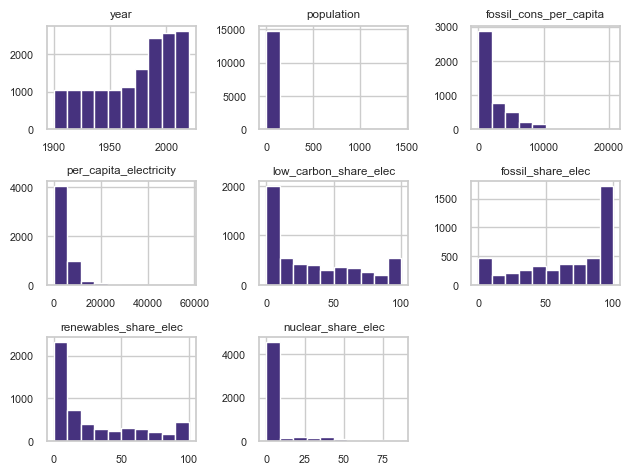

In [15]:
# Se visualizan los datos estadísticos, como primer acercamiento.
plt.figure(figsize=(20, 50))
sns.set(style="whitegrid", palette="viridis", font_scale=0.7)  
wec_ns.hist(bins=10)
plt.tight_layout()
plt.show()

### Filtramos por "year" para quedarnos con la ultima decada: 

In [16]:
# Se incluyen los años mayores a 2010 de la columna year.
wec_ns = wec_ns[(wec_ns['year'] > 2010)]

In [17]:
#Se muestarn los años comprendidos en el análisis
unique_years = wec_ns['year'].unique()
print("Años comprendidos en el análisis:", sorted(unique_years))

Años comprendidos en el análisis: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Calculamos las medias y armamos otro dataset. 

In [18]:
wec_medias = wec_ns.groupby('country').agg({
    'population': 'mean',
    'low_carbon_share_elec' : 'mean', 
    "fossil_share_elec": "mean",
    "renewables_share_elec": "mean",
    "nuclear_share_elec": "mean",
    "fossil_cons_per_capita" : 'mean', 
    "per_capita_electricity" : 'mean',
    'continente': 'first',
    'iso_code': 'first'
}).reset_index()

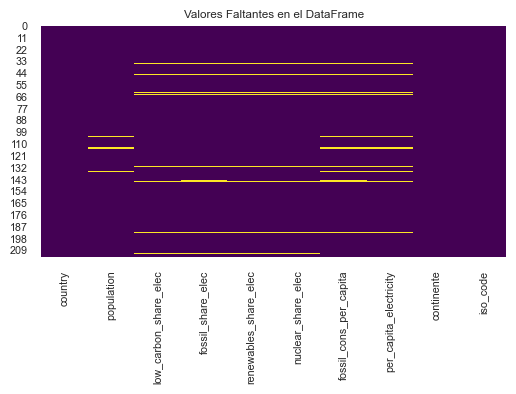

In [19]:
# visualización de valores faltantes
plt.figure(figsize=(6,3))
sns.heatmap(wec_medias.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

De cuantos países tenemos datos?

In [20]:
print(f"Cantidad de países de los que tenemos datos:")
len(wec_medias["country"].unique())

Cantidad de países de los que tenemos datos:


215

#### Población por país

In [21]:
import plotly.express as px
fig = px.bar(wec_ns,
             x='year',
             y='population',
             color='country',
             labels={'population': 'Población (millones de personas)', 'year': 'Años'},
             title='Crecimiento de la población por país a lo largo de los años',
             range_x=[2010, wec_ns['year'].max()],
             color_discrete_sequence=px.colors.sequential.Viridis,height=600)
fig.show()

La producción y consumo de electricidad, está vinculada con la cantidad de población de un país, por lo que resulta importante mostrar como ha crecido a lo largo de los años cada país. 

Eliminamos los nulos ya que no hay datos de los últimos 10 años para esos países. 

In [22]:
# Se eliminan las filas de acuerdo al criterio establecido. 
wec_medias.dropna(axis = 0, how = 'any', inplace = True)

In [23]:
print(f"Cantidad de paises de los que tenemos datos:")
len(wec_medias["country"].unique())

Cantidad de paises de los que tenemos datos:


203

In [24]:
# Se guarad el dataframe en un archivo csv
wec_medias.to_csv("../datasets/wec_ns.csv", index= False)

# Acceso a la electricidad

Agregamos datos de porcentaje de la poblacion con acceso a la electricidad: <br>
Importamos el csv del dataset:

In [25]:
# Se importa el dataset
acceso = pd.read_csv(r"../datasets/fuentes/share-of-the-population-with-access-to-electricity.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/fuentes/share-of-the-population-with-access-to-electricity.csv'

Eliminamos las filas correspondientes a regiones o agrupamientos de paises:

In [ ]:
regiones = ['Lower-middle-income countries', "Middle-income countries", "East Asia and Pacific (WB)", "Europe and Central Asia (WB)", 
"European Union (27)", "High-income countries", "Latin America and Caribbean (WB)", "Low-income countries", 
"Middle East and North Africa (WB)", "North America (WB)", "South Asia (WB)", "Sub-Saharan Africa (WB)", "Faeroe Islands", "Upper-middle-income countries", "World"]
acceso = acceso.loc[~acceso['Entity'].isin(regiones)]

Renombramos la columna para mayor claridad:

In [ ]:
acceso = acceso.rename(columns={"Entity": "country","Access to electricity (% of population)": "acceso_elec"})

Evaluamos la presencia de los valores nulos y corroboramos que no hay:

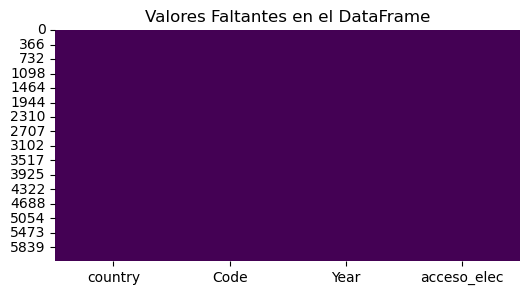

In [ ]:
# visualización de valores faltantes
plt.figure(figsize=(6,3))
sns.heatmap(acceso.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

Para filtrar los años, vemos cual es el último año que tenemos para cada pas y vemos que para todos es 2020:

In [ ]:
acceso.groupby('country')['Year'].max().unique()

array([2020], dtype=int64)

Asique nos quedamos con esas filas ya que nos interesa solo el último valor. 

In [ ]:
acceso_ns = acceso[acceso["Year"] == 2020]

Agregamos esos valores como columna al dataset wec_medias:

In [ ]:
wec_acceso = pd.merge(wec_medias, acceso_ns, on='country', how='left', suffixes=('_wec', '_acceso'))

In [ ]:
wec_acceso.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,Code,Year,acceso_elec
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,Asia,AFG,AFG,2020.0,97.70000
1,Albania,2.896444,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,Europa,ALB,ALB,2020.0,100.00000
2,Algeria,39.784222,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,África,DZA,DZA,2020.0,99.80413
3,American Samoa,0.055778,0.000000,100.000000,0.000000,0.0,2888.744333,2888.744333,Oceanía,ASM,NaN,NaN,NaN
4,Angola,27.940556,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,África,AGO,AGO,2020.0,46.89061


In [ ]:
wec_medias['acceso_elec'] = wec_acceso['acceso_elec']

In [ ]:
wec_medias.dropna(axis = 0, how = 'any', inplace = True)

### Guardamos a csv

In [ ]:
# wec_medias.to_csv("../datasets/wec_ns.csv", index= False)

In [ ]:
wec.to_csv("../datasets/wec_s.csv", index= False)

### Datasets para modelos supervisados: